In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
k = 3.085668*10**18
pi=math.pi
flux = 362.3 * 4548*10**(-11)

In [2]:
tab1 = pd.read_pickle('xstars_pm_r98_200pc_lkh10.pkl')

In [6]:
tab2 = pd.read_pickle('gaia_xstars_pm_r98_200pc_lkh10.pkl')

In [19]:
null = tab2['phot_bp_mean_mag'].isna()

In [45]:
null_ind = [null.index[i] for i in range(null.shape[0]) if null.iloc[i] == True]

In [47]:
tab3 = tab2.drop(null_ind, axis = 0)

In [95]:
phot_col = ['phot_bp_mean_mag','phot_rp_mean_mag','phot_g_mean_mag']

In [56]:
null_g = tab3['phot_g_mean_mag'].isna()

In [58]:
null_ind_g = [null_g.index[i] for i in range(null_g.shape[0]) if null_g.iloc[i] == True]

In [98]:
tab4 = tab3.drop(null_ind_g, axis = 0)

In [99]:
null_r = tab3['phot_rp_mean_mag'].isna()

In [100]:
null_ind_r = [null_r.index[i] for i in range(null_r.shape[0]) if null_r.iloc[i] == True]

In [101]:
tab_fin = tab4.drop(null_ind_r, axis = 0)

In [246]:
dop_tab = pd.DataFrame(index=tab_fin.index, columns = ['MG','Fbol','Log(Fx/Fo)','Lx','Lbol','Teff','dist_pc'], dtype='float64')

In [247]:
for i in range(tab_fin.shape[0]):
    dop_tab['MG'].iloc[i] = tab_fin[phot_col[2]].iloc[i]+5+5*(math.log10(tab_fin['parallax'].iloc[i])-3)
    dop_tab['Fbol'].iloc[i] = 10**(-tab_fin[phot_col[2]].iloc[i]/2.5)*flux
    #dop_tab['bp_rp'].iloc[i] = tab_fin[phot_col[0]].iloc[i] - tab_fin[phot_col[1]].iloc[i]
    dop_tab['Log(Fx/Fo)'].iloc[i] = math.log10(tab_fin['ML_FLUX_0'].iloc[i]/dop_tab['Fbol'].iloc[i])
    dop_tab['Lx'].iloc[i] = 4*pi*tab_fin['ML_FLUX_0'].iloc[i]*(1000*k/tab_fin['parallax'].iloc[i])**2
    dop_tab['Lbol'].iloc[i] = 4*pi*dop_tab['Fbol'].iloc[i]*(1000*k/tab_fin['parallax'].iloc[i])**2
    BR = tab_fin['bp_rp'].iloc[i]
    dop_tab['Teff'].iloc[i] = 7928. - 3663.*BR + 803.*BR**2 - 9.*BR**3 + 325.*4.5 - 500.*4.5*BR + 278.*4.5*BR**2-53.5*4.5*BR**3
    dop_tab['dist_pc'].iloc[i] = 1000/tab_fin['parallax'].iloc[i]

In [248]:
dop_tab.index = tab_fin.index

In [249]:
tab = pd.concat([tab_fin,dop_tab],axis = 1)

In [250]:
neg = tab['Teff'] < 0

In [251]:
tab = tab.drop(tab['bp_rp'][neg].index, axis = 0)

In [252]:
tab.to_pickle('gaia_xstars_pm_r98_200pc_lkh10_clean.pkl')

In [253]:
tab_drop = tab.drop_duplicates(subset='hpidx')

In [254]:
tab_drop.to_pickle('gaia_xstars_pm_r98_200pc_lkh10_woutdup.pkl')

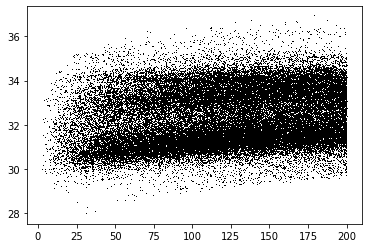

In [257]:
plt.plot(tab_drop['dist_pc'],np.log10(tab_drop['Lbol']),'k,')